# Covid Analysis

This notebook analyzes the US Covid data from this web site: [The Covid Tracker: Data](https://covidtracking.com/data/download).  the data definitions can be found on a page linked form that initial page: [The Covid Tracker: Data Definition](https://covidtracking.com/about-data/data-definitions).

The first level of analysis is to performa a moving average to find the 'average' shape of the curve for number of new cases, which is indicated by the field name <font face='courier'>positiveIncrease</font>.

This example is for illustration of a data analysis and so, to save a bit of effort we will not worry about formatting the x-axis tickmark labels for clarity.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## Data Wrangling

The cell below does some data wrangling to get the data in shape for analysis.  We won't spend time on this code in class.

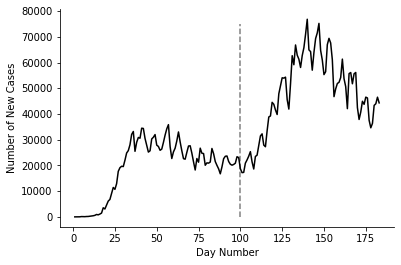

In [34]:
f = open('national-history.csv','r')
data = f.readlines()
f.close()

date_cutoff = 20200229

data[0] = data[0].replace('"','').strip().split(',')
ind = False
for i in range(len(data[0])):
    if data[0][i] == 'positiveIncrease':
        ind = i
        break
        
if ind:
    for i in range(1,len(data)):
        data[i] = data[i].strip().split(',')
        data[i][0] = int(data[i][0])
        data[i][ind] = int(data[i][ind])


    headings = [data[0]]
    data = data[1:]
    for i in range(len(data)-1, -1, -1):
        if data[i][0]< date_cutoff:
            del[data[i]]
    data.sort()
    data = headings + data

    date = [data[i][ind] for i in range(1,len(data)) if data[i][0] >= 20200229]
    y = [data[i][ind] for i in range(1,len(data)) if data[i][0] >= 20200229]
    x = [i for i in range(1,len(data)) if data[i][0] >= 20200229]

Let's look at the data.

In [148]:
data[:5]

[['date',
  'death',
  'deathIncrease',
  'inIcuCumulative',
  'inIcuCurrently',
  'hospitalizedIncrease',
  'hospitalizedCurrently',
  'hospitalizedCumulative',
  'negative',
  'negativeIncrease',
  'onVentilatorCumulative',
  'onVentilatorCurrently',
  'posNeg',
  'positive',
  'positiveIncrease',
  'recovered',
  'states',
  'totalTestResults',
  'totalTestResultsIncrease'],
 [20200229,
  '5',
  '1',
  '',
  '',
  '0',
  '',
  '',
  '24',
  '24',
  '',
  '',
  '42',
  '18',
  18,
  '',
  '2',
  '42',
  '42'],
 [20200301,
  '8',
  '3',
  '',
  '',
  '0',
  '',
  '',
  '85',
  '61',
  '',
  '',
  '130',
  '45',
  27,
  '',
  '4',
  '130',
  '88'],
 [20200302,
  '11',
  '3',
  '',
  '',
  '0',
  '',
  '',
  '243',
  '158',
  '',
  '',
  '328',
  '85',
  40,
  '',
  '4',
  '328',
  '198'],
 [20200303,
  '14',
  '3',
  '',
  '',
  '0',
  '',
  '',
  '446',
  '203',
  '',
  '',
  '572',
  '126',
  41,
  '',
  '4',
  '572',
  '244']]

Let's visualize the data.  What patterns or characteristics do you see?

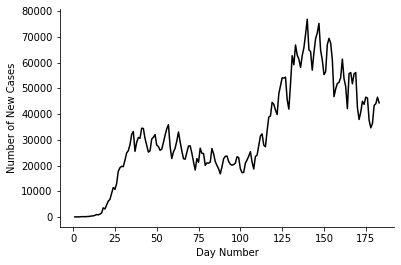

In [150]:
fig,ax = plt.subplots()
ax.plot(x,y, c='k')
ax.set_xlabel('Day Number')
ax.set_ylabel('Number of New Cases')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.vlines(100, 0, 75000, linestyles='dashed', colors=['gray'])
plt.show()

Let's compute, and view, a moving average to look at the overall average trend.

Let's also subtract out the trend and view the remainder.  Does it have any obvious patterns?

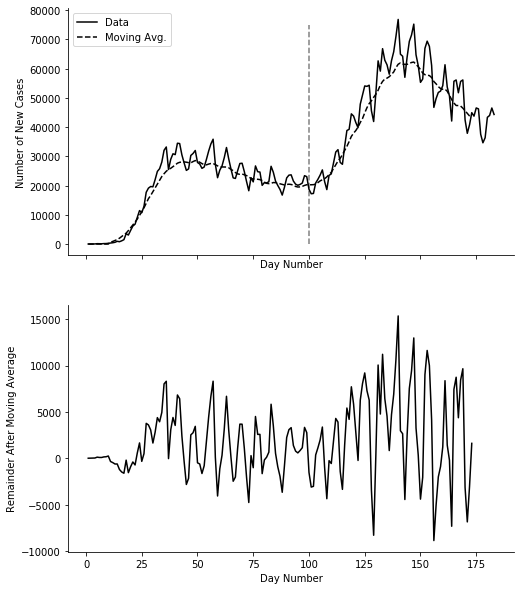

In [164]:
mv_avg_period = 20
offset = int(mv_avg_period/2)
mv_avg = [0 for i in range(mv_avg_period - offset)] + [sum(y[i-mv_avg_period:i-1])/mv_avg_period for i in range(mv_avg_period, len(y))] 
remainder = [y[i] - mv_avg1[i] for i in range(len(y[:-offset]))]
fig,ax = plt.subplots(2,1, sharex=True)
ax[0].plot(x,y, c='k', label='Data')
ax[0].plot(x[:-offset],mv_avg, c='k', linestyle='--', label='Moving Avg.')
ax[0].set_xlabel('Day Number')
ax[0].set_ylabel('Number of New Cases')
ax[0].vlines(100, 0, 75000, linestyles='dashed', colors=['gray'])
ax[0].legend()
ax[1].plot(x[:-offset],remainder,c='k')
ax[1].set_xlabel('Day Number')
ax[1].set_ylabel('Remainder After Moving Average')
for i in range(len(ax)):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
fig.set_size_inches(8,10)
plt.show()

## Autocorrelation Analysis

We will use <font face='courier'>numpy</font> to compute autocorrelation.

In [87]:
import numpy as np

In [104]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

The results below demosntrate a clear pattern of 7-day cyclicality.  What might be causing it?

In [110]:
for lag in range(1,21):
    print('Correlation with lag ' + str(lag) + ': ', autocorr(remainder,t=lag)[0,1])

Correlation with lag 1:  0.54406908610024
Correlation with lag 2:  0.06944071340293036
Correlation with lag 3:  -0.24352768267821404
Correlation with lag 4:  -0.2667482853964427
Correlation with lag 5:  -0.027336447451804583
Correlation with lag 6:  0.3887770353773463
Correlation with lag 7:  0.6249105627244699
Correlation with lag 8:  0.4201640355029149
Correlation with lag 9:  -0.0667635171605197
Correlation with lag 10:  -0.3956893431723991
Correlation with lag 11:  -0.3589080899381073
Correlation with lag 12:  -0.03610586934901375
Correlation with lag 13:  0.3865379908608228
Correlation with lag 14:  0.604222584295389
Correlation with lag 15:  0.3701215040289834
Correlation with lag 16:  -0.054187102895258424
Correlation with lag 17:  -0.39546416580760463
Correlation with lag 18:  -0.4167599284114806
Correlation with lag 19:  -0.11840998561565293
Correlation with lag 20:  0.25544755210847003


## Compute Trend with Bass Diffusion Model

This analysis is beyond the scope of this course, but illustrates another technique for estimating trend.  We will use it for the first contagion pattern in the data and subtract that out of the original data.  Subsequently, one could use the Bass model to fit the second contagion pattern in the data.

In [157]:
pattern_div = 100

In [158]:
from sklearn.linear_model import LinearRegression 
cum_y = [sum(y[:i]) for i in x]
cum_y2 = [y**2 for y in cum_y]
ind_vars = [[cum_y[i],cum_y2[i]] for i in range(len(cum_y))]
cum_y, cum_y2

regr = LinearRegression()
regr.fit(ind_vars[:pattern_div][:-1],y[:pattern_div][1:])
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
i_vars = [y for y in ind_vars[:pattern_div]]
forecast = [y[0]]
for i in range(pattern_div, len(y)):
    predict = regr.predict(i_vars)
    if i == pattern_div:
        forecast += list(predict)
    else:
        forecast.append(predict[-1])
    i_vars.append([i_vars[-1][0]+predict[-1],(i_vars[-1][0]+predict[-1])**2])

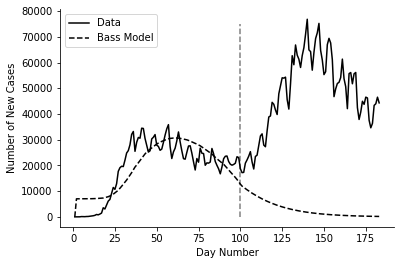

In [163]:
fig,ax = plt.subplots()
ax.plot(x,y, c='k', label='Data')
ax.plot(x,forecast, c='k', linestyle='--', label='Bass Model')
ax.set_xlabel('Day Number')
ax.set_ylabel('Number of New Cases')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(pattern_div, 0, 75000, linestyles='dashed', colors=['gray'])
ax.legend()
plt.show()

Then, we could subtract the first diffusion pattern out of the model and do the same analysis for period 100 and beyond.

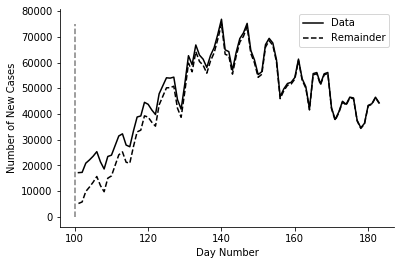

In [162]:
remainder = [y[i] - forecast[i] for i in range(pattern_div,len(y))]
fig,ax = plt.subplots()
ax.plot(x[pattern_div:],y[pattern_div:], c='k', label='Data')
ax.plot(x[pattern_div:],remainder, c='k', linestyle='--', label='Remainder')
ax.set_xlabel('Day Number')
ax.set_ylabel('Number of New Cases')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.vlines(pattern_div, 0, 75000, linestyles='dashed', colors=['gray'])
ax.legend()
plt.show()